In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [5]:
data = pd.read_csv('milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


# Exploratory Data Analysis

In [6]:
data.shape # Rows,Columns

(1059, 8)

In [7]:
data['Grade'].replace({'high':2,'medium':1,'low':0},inplace=True) # Or you can use label encoder.

In [8]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [9]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [10]:
data.isnull().sum() # We don't have any null wariables.(So,you can pass the missing values handling part.)

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

# Checking if we need to dimensionaly reduction

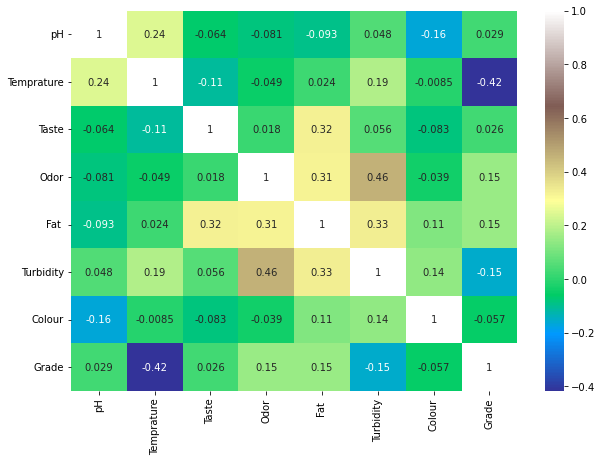

In [11]:
sbn.heatmap(data.corr(),annot = True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

# Let's check the outlier using boxplot

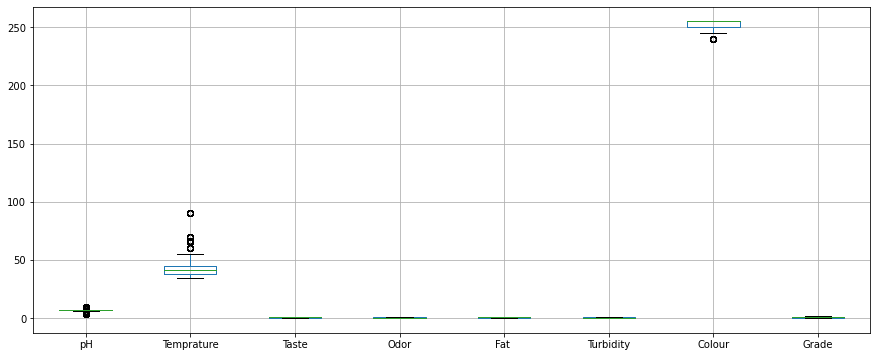

In [12]:
data.boxplot(figsize = (15,6))
plt.show()

In [13]:
# All the features are important for our prediction,so we won't drop any features in our dataset.

In [14]:
data['Grade'].value_counts()

0    429
1    374
2    256
Name: Grade, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


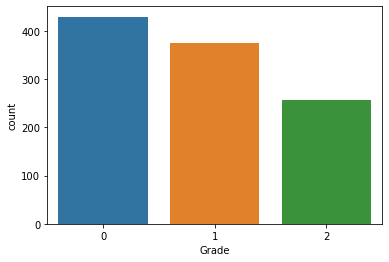

In [15]:
sbn.countplot(data['Grade'])
plt.show()
## 0:Low Quality | 1:Medium Quality | 2:High Quality

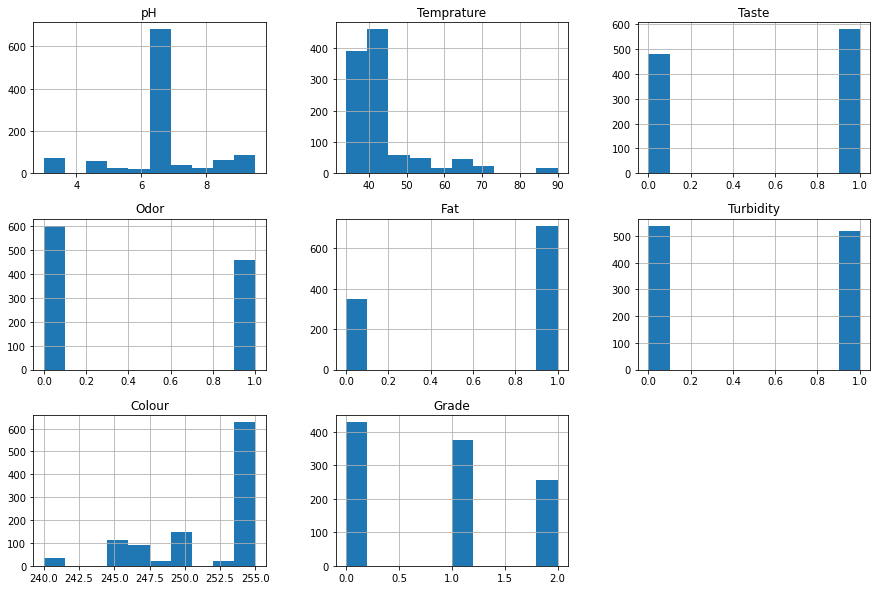

In [16]:
data.hist(figsize =(15,10))
plt.show()

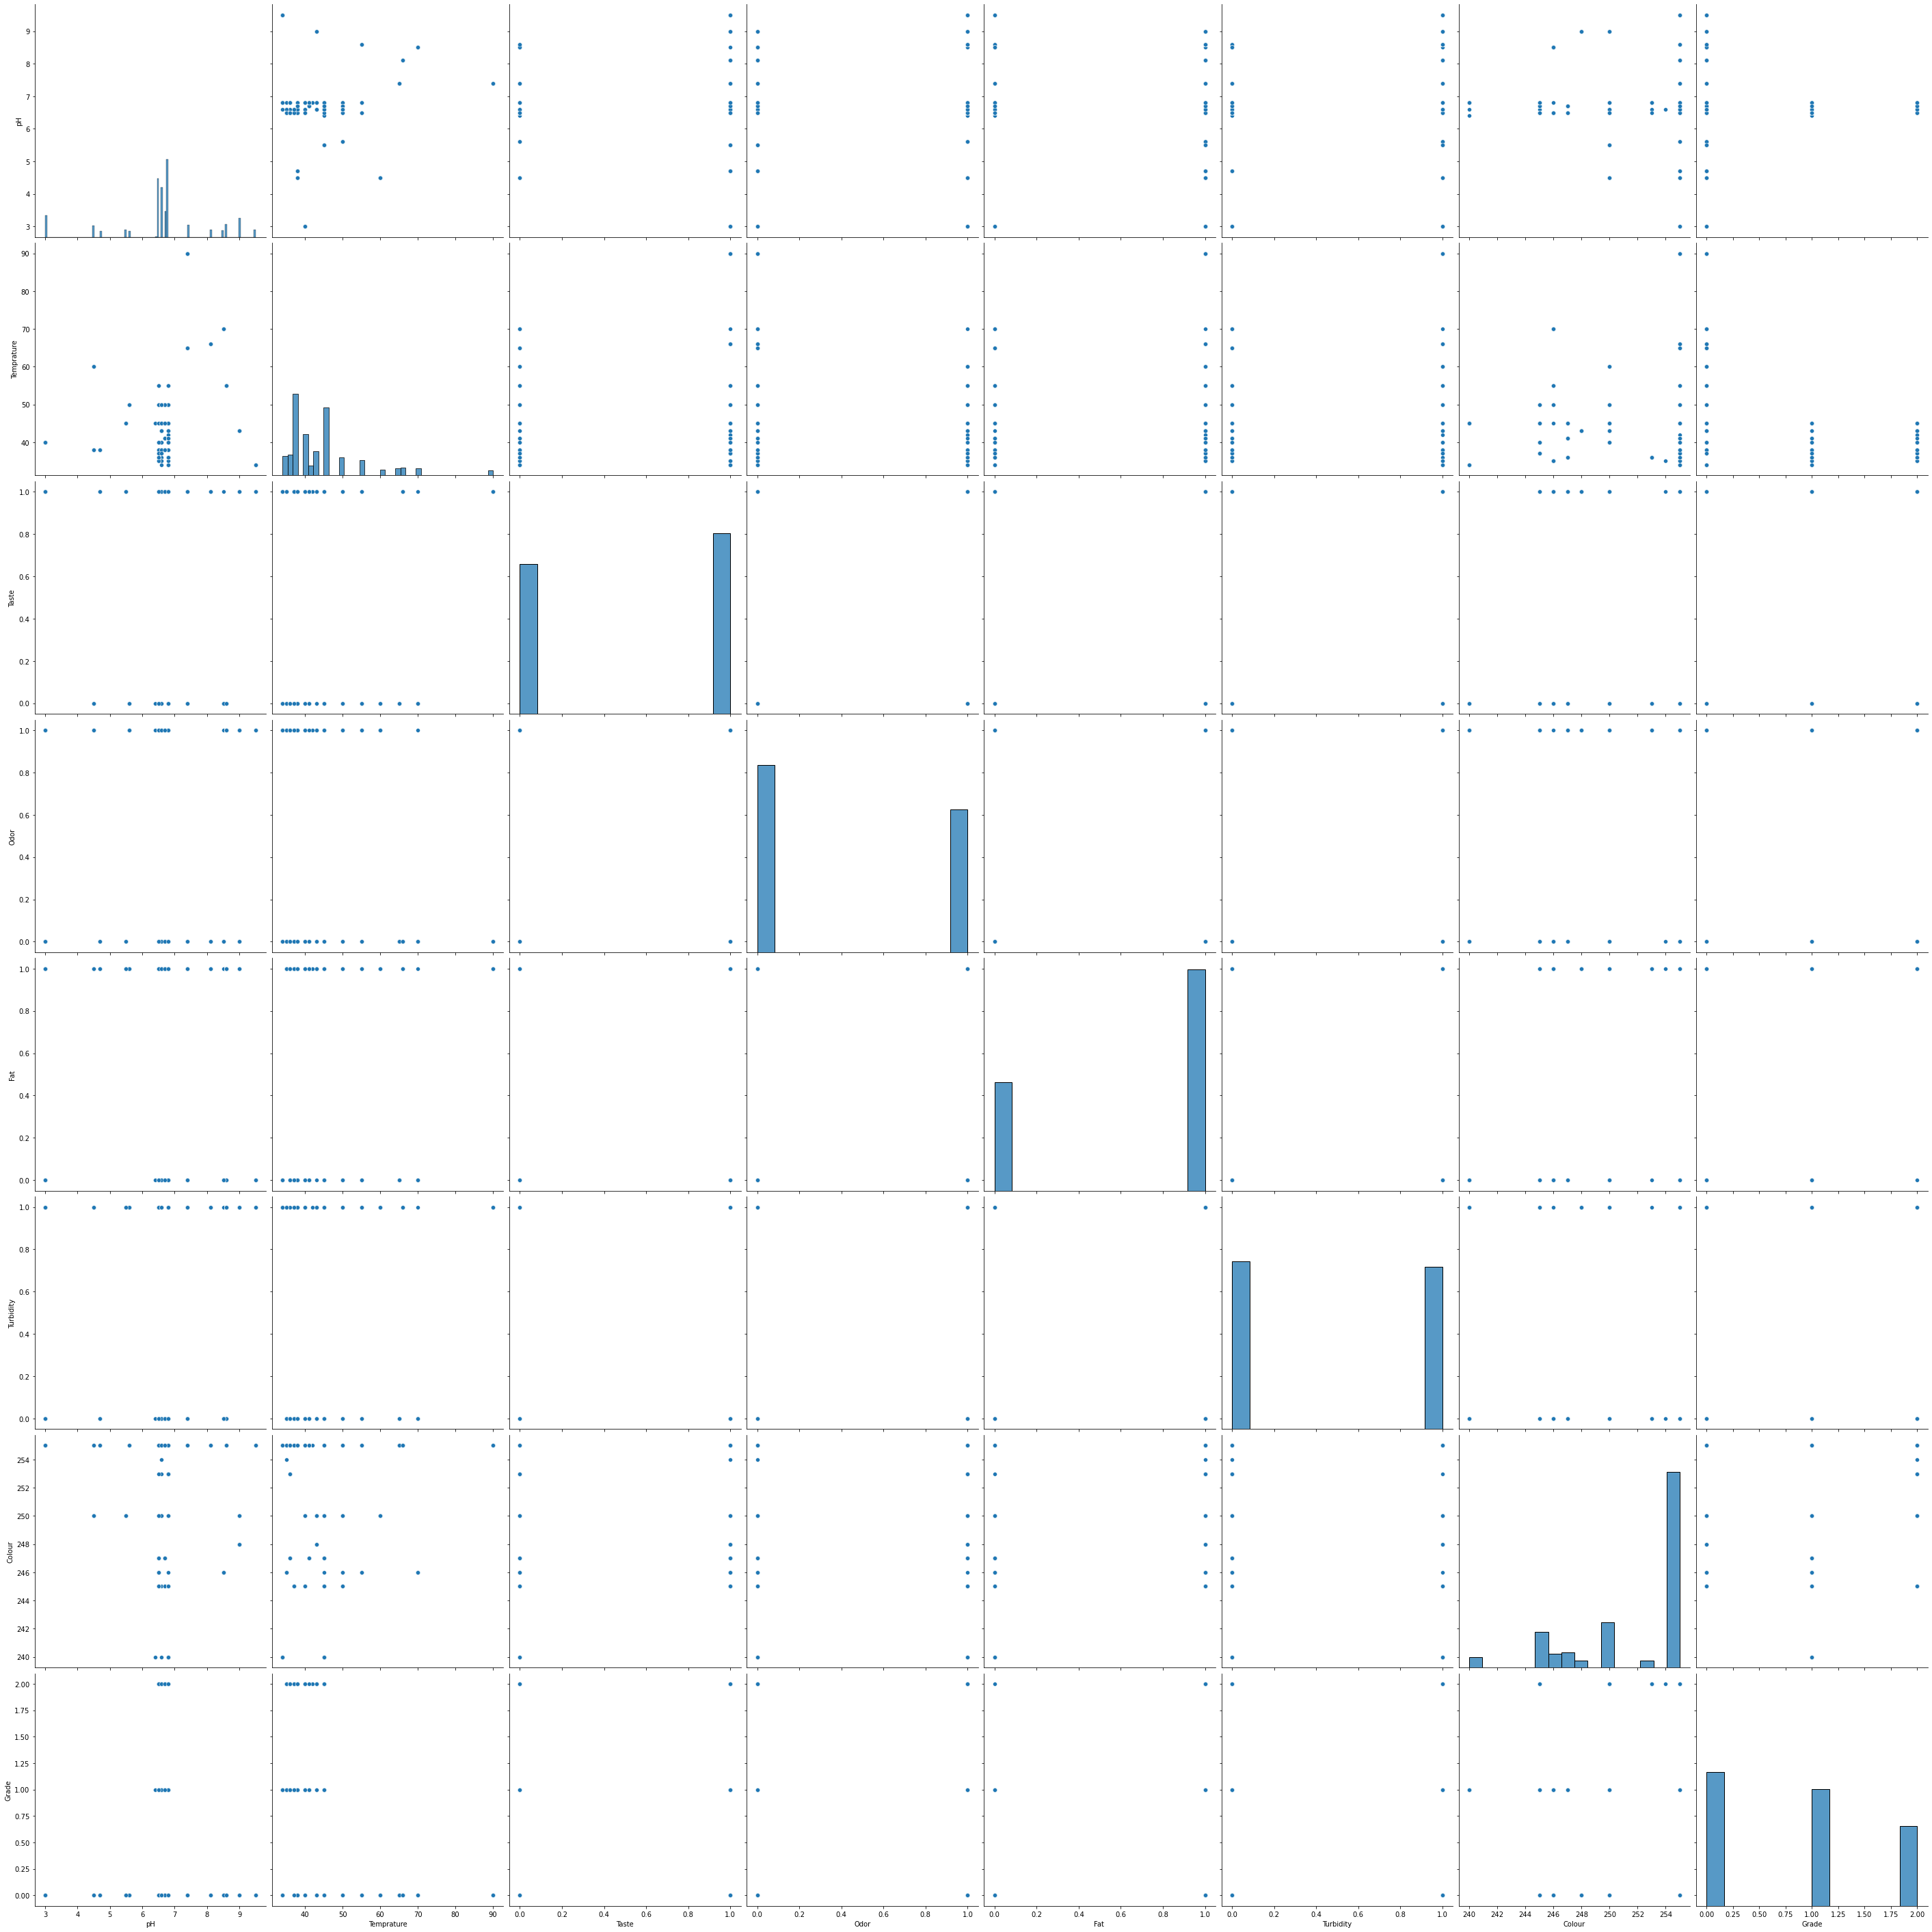

In [17]:
sbn.pairplot(data,height=5)

In [20]:
X = data.drop('Grade',axis = 1) # Input data

In [19]:
X

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [21]:
Y = data['Grade']

In [22]:
Y

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64

# Spliting Data

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state=0)

In [29]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
425,6.6,35,0,1,1,1,255
503,6.8,41,0,0,1,0,255
258,6.6,38,0,0,1,0,255
943,9.0,43,1,0,1,1,250
810,6.5,37,0,0,0,0,245
...,...,...,...,...,...,...,...
1033,6.6,38,0,0,0,0,255
763,5.6,50,0,1,1,1,255
835,4.7,38,1,0,1,0,255
559,9.0,43,1,0,1,1,250


In [30]:
X_test

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
418,6.6,37,1,1,1,1,255
202,9.0,43,1,0,1,1,250
682,6.8,45,0,0,0,1,255
316,5.6,50,0,1,1,1,255
267,6.8,45,1,1,1,1,245
...,...,...,...,...,...,...,...
10,6.7,45,1,1,1,0,245
105,6.6,35,0,1,1,1,255
68,4.7,38,1,0,1,0,255
90,6.6,50,0,0,0,1,250


# Data Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [32]:
X_train

array([[-0.01713411, -0.89411949, -1.0777687 , ...,  0.72664795,
         1.04767988,  0.72435835],
       [ 0.12170116, -0.3147464 , -1.0777687 , ...,  0.72664795,
        -0.95449003,  0.72435835],
       [-0.01713411, -0.60443295, -1.0777687 , ...,  0.72664795,
        -0.95449003,  0.72435835],
       ...,
       [-1.33606925, -0.60443295,  0.92784287, ...,  0.72664795,
        -0.95449003,  0.72435835],
       [ 1.64888921, -0.12162204,  0.92784287, ...,  0.72664795,
         1.04767988, -0.44231605],
       [-0.08655175, -0.60443295,  0.92784287, ..., -1.37618224,
        -0.95449003,  0.72435835]])

In [33]:
X_test

array([[-0.03138815, -0.75055969,  0.87617165, ...,  0.64575851,
         0.96076892,  0.7532854 ],
       [ 1.79958718, -0.12159906,  0.87617165, ...,  0.64575851,
         0.96076892, -0.39802416],
       [ 0.12119313,  0.08805449, -1.14132887, ..., -1.54856652,
         0.96076892,  0.7532854 ],
       ...,
       [-1.48091029, -0.64573292,  0.87617165, ...,  0.64575851,
        -1.040833  ,  0.7532854 ],
       [-0.03138815,  0.61218835, -1.14132887, ..., -1.54856652,
         0.96076892, -0.39802416],
       [-0.03138815,  0.61218835, -1.14132887, ..., -1.54856652,
         0.96076892, -0.39802416]])

# Model Training

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)

In [54]:
log_reg.fit(X_train,Y_train)
y_predLog_Reg = log_reg.predict(X_test)

In [55]:
y_predLog_Reg

array([2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0,
       0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1,

In [41]:
Y_test.values

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [99]:
accuracy_score(y_predLog_Reg,Y_test)

0.7828571428571428

In [100]:
confusion_matrix(y_predLog_Reg,Y_test)

array([[111,   5,  30],
       [  5, 103,   4],
       [ 14,  18,  60]], dtype=int64)

# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy') # Also you can try 'gini' parameter according to 'entropy'.

In [102]:
dtc.fit(X_train,Y_train)
y_predDTC = dtc.predict(X_test)

In [103]:
y_predDTC

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [104]:
Y_test.values

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [105]:
accuracy_score(y_predDTC,Y_test)

0.9885714285714285

In [106]:
confusion_matrix(y_predDTC,Y_test)

array([[127,   0,   0],
       [  1, 126,   1],
       [  2,   0,  93]], dtype=int64)

# SVC (Support Vector Classifier)

In [66]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf') # The kernel can be polynomial etc.

In [67]:
svc.fit(X_train,Y_train)
y_predSVC = svc.predict(X_test)

In [68]:
y_predSVC

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [69]:
Y_test.values

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [70]:
accuracy_score(y_predSVC,Y_test)

0.9285714285714286

In [71]:
confusion_matrix(y_predSVC,Y_test)

array([[124,   0,   0],
       [  1, 108,   1],
       [  5,  18,  93]], dtype=int64)

# KNN (K-Nearest Neighborhood)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski')
# Minkowski is a kind of distance measurement formula.
# n_neighbors = Number of neighbors (You can change it.)

In [111]:
knn.fit(X_train,Y_train)
y_predKNN = knn.predict(X_test)

In [112]:
y_predKNN

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [114]:
Y_test.values

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [117]:
accuracy_score(y_predKNN,Y_test)

0.9857142857142858

In [118]:
confusion_matrix(y_predKNN,Y_test)

array([[127,   1,   0],
       [  1, 125,   1],
       [  2,   0,  93]], dtype=int64)

# Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10,criterion='entropy')

In [123]:
rfc.fit(X_train,Y_train)
y_predRFC = rfc.predict(X_test)

In [124]:
y_predRFC

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [125]:
Y_test.values

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [126]:
accuracy_score(y_predRFC,Y_test)

0.9885714285714285

In [127]:
confusion_matrix(y_predRFC,Y_test)

array([[127,   0,   0],
       [  1, 126,   1],
       [  2,   0,  93]], dtype=int64)

# Naive Bayes

In [128]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [129]:
gnb.fit(X_train,Y_train)
y_predGNB = gnb.predict(X_test)

In [130]:
y_predGNB

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [131]:
Y_test.values

array([2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [133]:
accuracy_score(y_predGNB,Y_test)

0.7142857142857143

In [134]:
confusion_matrix(y_predGNB,Y_test)

array([[124,   0,  62],
       [  6, 126,  32],
       [  0,   0,   0]], dtype=int64)